In [2]:
from google.colab import files
uploaded = files.upload()

Saving wine.csv to wine.csv


In [3]:
# === Import Libraries ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score, adjusted_mutual_info_score

In [4]:
# === Reading Dataset ===
df = pd.read_csv("wine.csv")
df.head()


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
# Let's check basic info

print("=== Shape of the DataFrame ===")
print(df.shape, "\n")

print("=== Info about the DataFrame ===")
df.info()
print("\n")

print("=== Descriptive Statistics ===")
print(df.describe(), "\n")

print("=== Missing Values in Each Column ===")
print(df.isnull().sum())


=== Shape of the DataFrame ===
(178, 14) 

=== Info about the DataFrame ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


=== Descriptive Statistics ==

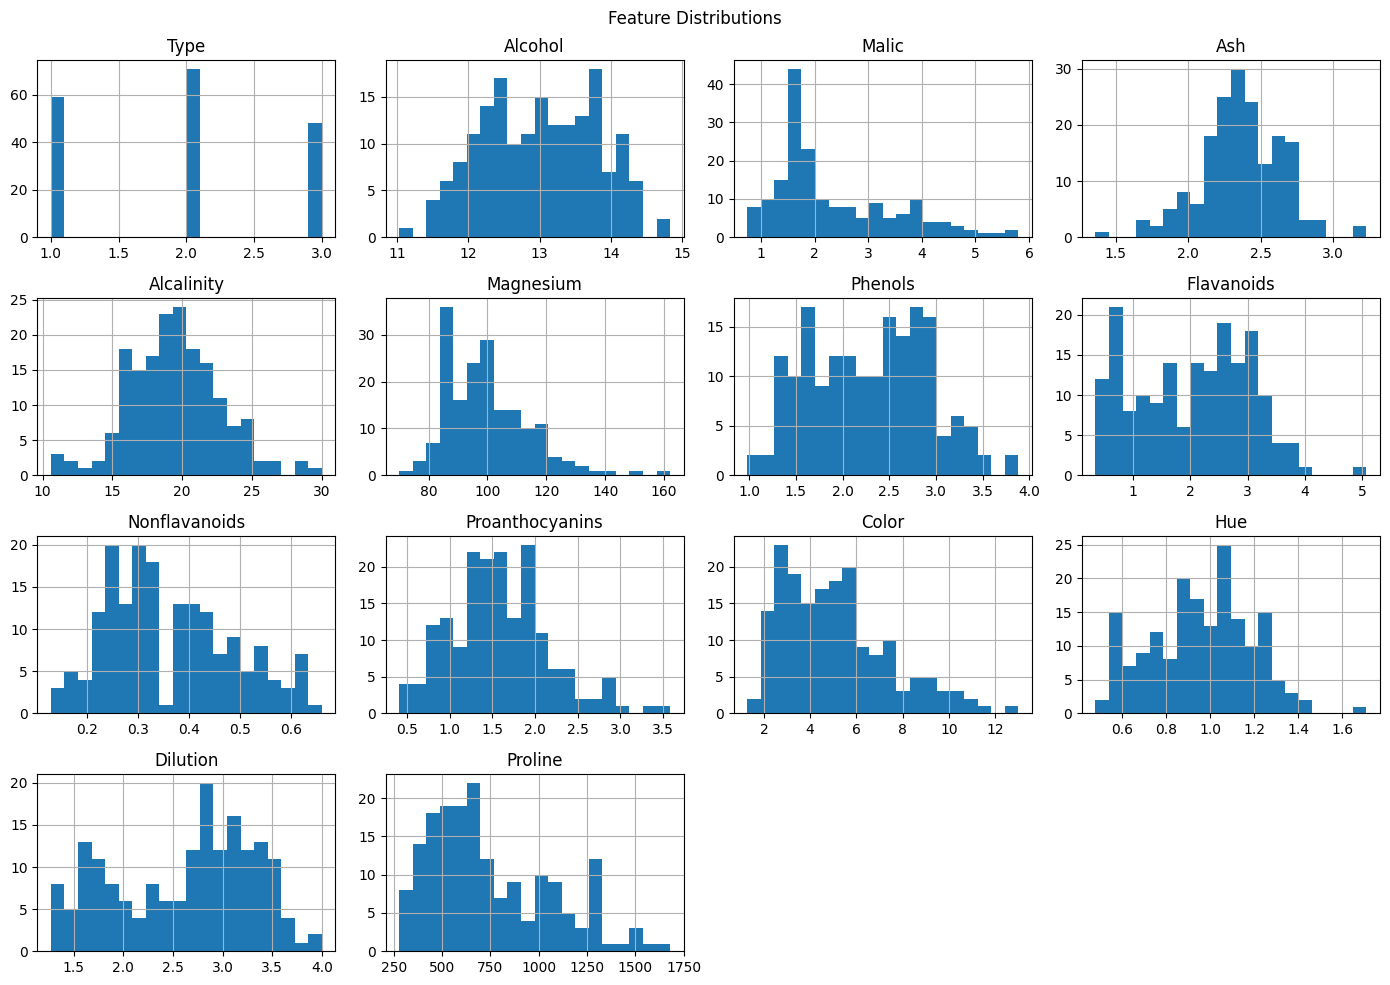

In [6]:
# === EDA Plots ===
# Histograms
df.hist(figsize=(14, 10), bins=20)
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

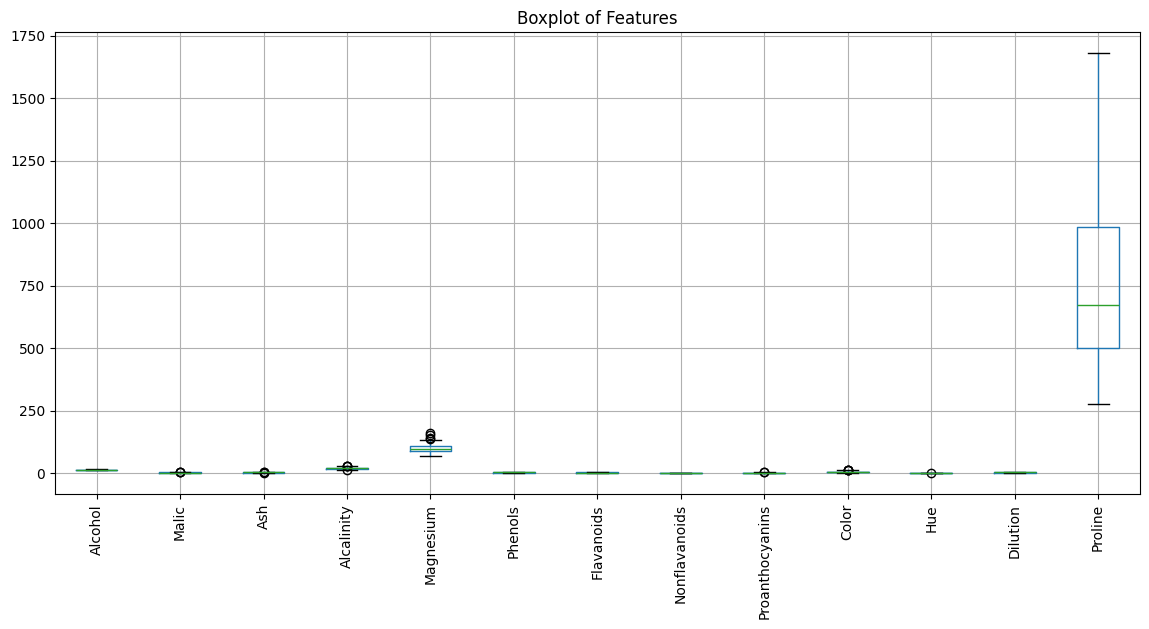

In [7]:
# Boxplots
plt.figure(figsize=(14, 6))
df.drop('Type', axis=1).boxplot(rot=90)
plt.title("Boxplot of Features")
plt.show()


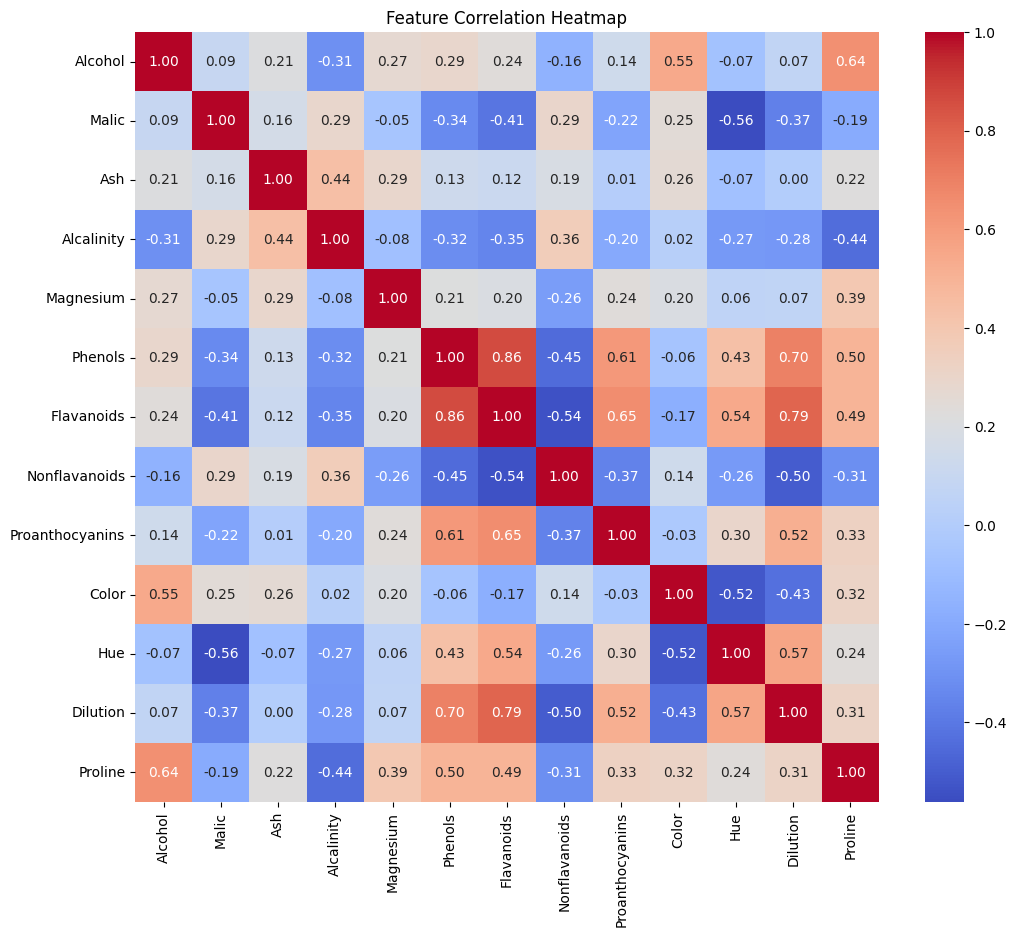

In [8]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.drop('Type', axis=1).corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [9]:
# === Feature Scaling ===
X = df.drop('Type', axis=1)
y = df['Type']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
# === PCA ===
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


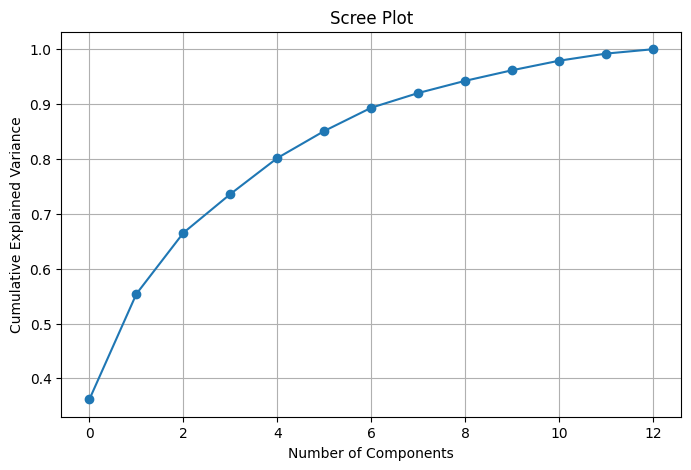

In [11]:
# Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()


In [12]:
# Reduce to 95% explained variance
pca_opt = PCA(n_components=0.95)
X_pca_opt = pca_opt.fit_transform(X_scaled)
print("PCA Reduced Shape:", X_pca_opt.shape)


PCA Reduced Shape: (178, 10)


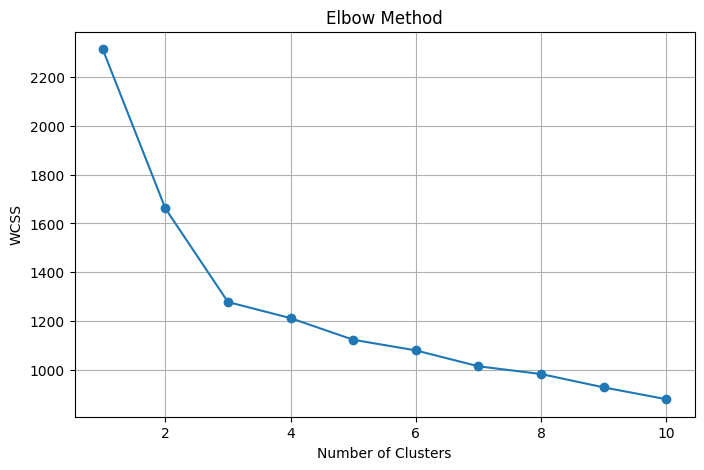

In [13]:
# === Elbow Method ===
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [14]:
# === Clustering on Original Data ===
kmeans_orig = KMeans(n_clusters=3, random_state=42)
labels_orig = kmeans_orig.fit_predict(X_scaled)

In [15]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)


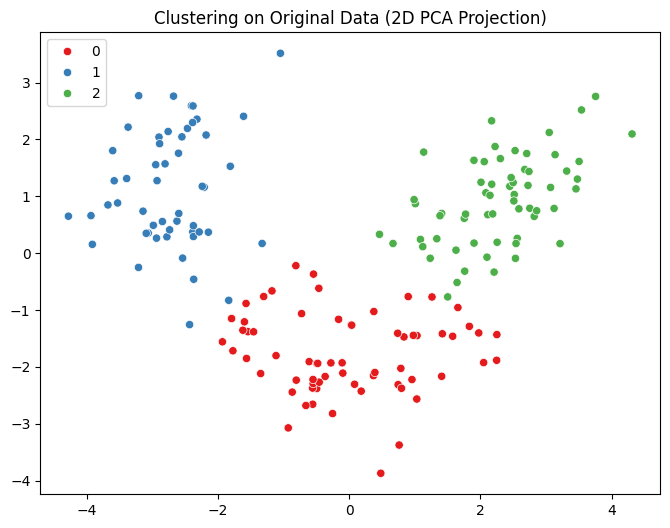

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=labels_orig, palette='Set1')
plt.title("Clustering on Original Data (2D PCA Projection)")
plt.show()


In [17]:
sil_orig = silhouette_score(X_scaled, labels_orig)
db_orig = davies_bouldin_score(X_scaled, labels_orig)
ari_orig = adjusted_rand_score(y, labels_orig)
ami_orig = adjusted_mutual_info_score(y, labels_orig)


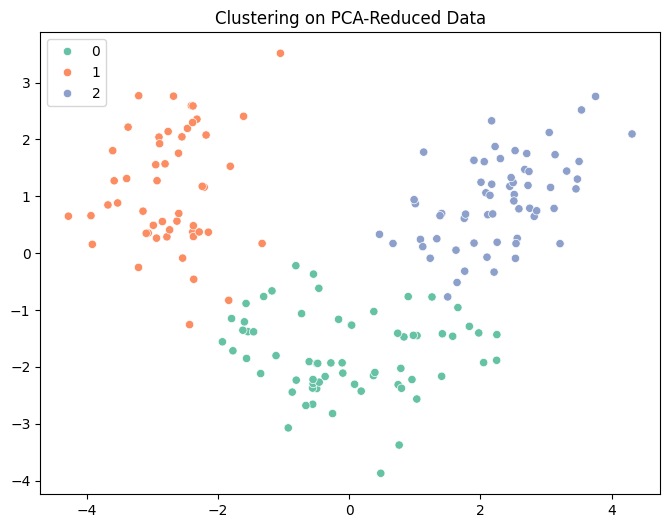

In [18]:
# === Clustering on PCA-Reduced Data ===
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca_opt)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_opt[:, 0], y=X_pca_opt[:, 1], hue=labels_pca, palette='Set2')
plt.title("Clustering on PCA-Reduced Data")
plt.show()

In [19]:
sil_pca = silhouette_score(X_pca_opt, labels_pca)
db_pca = davies_bouldin_score(X_pca_opt, labels_pca)
ari_pca = adjusted_rand_score(y, labels_pca)
ami_pca = adjusted_mutual_info_score(y, labels_pca)


In [20]:
# === Results Comparison ===
print("\n=== Clustering Performance Comparison ===")
print(f"Original Data -> Silhouette: {sil_orig:.3f}, DB: {db_orig:.3f}, ARI: {ari_orig:.3f}, AMI: {ami_orig:.3f}")
print(f"PCA Reduced   -> Silhouette: {sil_pca:.3f}, DB: {db_pca:.3f}, ARI: {ari_pca:.3f}, AMI: {ami_pca:.3f}")


=== Clustering Performance Comparison ===
Original Data -> Silhouette: 0.285, DB: 1.389, ARI: 0.897, AMI: 0.875
PCA Reduced   -> Silhouette: 0.299, DB: 1.336, ARI: 0.897, AMI: 0.875


In [21]:
# === Summary ===
if sil_pca > sil_orig:
    print("\n PCA improved silhouette score (cluster separation).")
else:
    print("\n PCA reduced silhouette score.")

if db_pca < db_orig:
    print(" PCA improved Davies-Bouldin (intra-cluster compactness).")
else:
    print(" PCA worsened Davies-Bouldin index.")



 PCA improved silhouette score (cluster separation).
 PCA improved Davies-Bouldin (intra-cluster compactness).


Key Observations:
Clustering on Original Data:

Silhouette Score: 0.285

Davies–Bouldin Index: 1.389

Adjusted Rand Index (ARI): 0.897

Adjusted Mutual Information (AMI): 0.875

These metrics indicate that the clustering closely matches the true class labels (Type), with reasonably well-separated and compact clusters.

Clustering on PCA-Reduced Data (95% variance, 10 components):

Silhouette Score: 0.299 (↑)

Davies–Bouldin Index: 1.336 (↓)

ARI: 0.897 (same)

AMI: 0.875 (same)

PCA led to slight improvement in both silhouette and Davies–Bouldin scores, indicating better intra-cluster cohesion and separation, while preserving the clustering structure (no change in ARI/AMI).

Interpretation:
PCA helped improve cluster quality slightly by reducing noise and redundant information, making the clustering process more efficient.

The clustering performance did not degrade after dimensionality reduction, showing PCA as a safe preprocessing step in this case.

The consistency of ARI and AMI suggests that PCA retained the most discriminative structure of the data even after reducing from 13 to 10 dimensions.
